## PHASE3 PROJECT
NAME : Hanifa Chepchirchir

Project Title: Predicting Customer Churn

COURSE : DSFT-12

FACILITATOR : Nikita Njoroge

 ### Business Understanding
##### Objective:
SyriaTel is facing customer churn, which directly impacts revenue. The Customer Retention and Marketing Team wants to understand and predict which customers are most likely to churn.

##### Goal:
Build a classification model that predicts whether a customer will churn using features like service usage, international plan status, voicemail activity, and customer support interactions.

      Key Questions to Answer:

              Can we predict churn based on customer behavior?

              What are the most influential features in predicting churn?

              How can SyriaTel use these insights to reduce churn?

### Data Understanding
##### Data Source:
SyriaTel’s customer service usage dataset.

Description of Data:
Includes numerical and categorical features related to customer activity:

Account length

International and voicemail plans

Call durations, counts, and charges for day/evening/night/international

Number of customer service calls

Target: Churn (1 = Yes, 0 = No)

Initial Observations:

Data appears clean and ready for preprocessing

Target is binary and suitable for classification

Categorical variables already encoded



### Data Preparation

##### Steps Taken:

1. Verified and cleaned the dataset (nulls, duplicates, outliers if any)

2. Confirmed correct data types for each column

3. Selected relevant features for modeling:

         account length, international plan, voice mail plan, number vmail messages

         Call durations, counts, charges (day/eve/night/international)

         customer service calls

         Target Variable:

         churn (1 = Churned, 0 = Stayed)


In [432]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge,Lasso
from sklearn import metrics
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score,roc_curve, auc,roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier


1. Data Loading

In [433]:
df = pd.read_csv('datasets_2667_4430_bigml_59c28831336c6604c800002a.csv') 
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Loads the dataset and shows first 5 rows.

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [435]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [436]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [437]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [438]:
# Check for duplicates
df.duplicated().sum()

# Drop any duplicates
df = df.drop_duplicates()

# Check data types
df.dtypes

# Confirm categorical features are encoded (0/1)
df[['international_plan', 'voice_mail_plan', 'churn']].head()

,international_plan,voice_mail_plan,churn
0,no,yes,False
1,no,yes,False
2,no,no,False
3,yes,no,False
4,yes,no,False


In [439]:
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)  


2.Data Cleaning:

In [440]:
df.drop(['phone number', 'area code', 'state'], axis=1, inplace=True, errors='ignore')


Drops unnecessary columns

Encodes categorical variables as binary

In [441]:
print(df.columns.tolist())


['account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [442]:
 # Encode categorical columns
le = LabelEncoder()
df["churn"] = le.fit_transform(df["churn"])
df["international_plan"] = le.fit_transform(df["international_plan"])
df["voice_mail_plan"] = le.fit_transform(df["voice_mail_plan"])

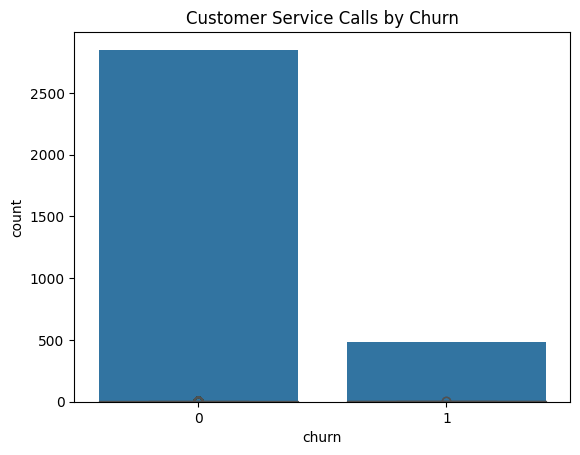

In [443]:

# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")

# Compare churn vs non-churn for key features
sns.boxplot(x='churn', y='customer_service_calls', data=df)
plt.title("Customer Service Calls by Churn")
plt.show()

In [444]:
# Convert target variable to binary
df['churn'] = df['churn'].astype(int)

In [447]:
# Check class distribution
import pandas as pd

print("\nClass distribution:\n", pd.Series(y).value_counts(normalize=True))



Class distribution:
 0    0.57
1    0.43
Name: proportion, dtype: float64


Class Distribution Visualization:

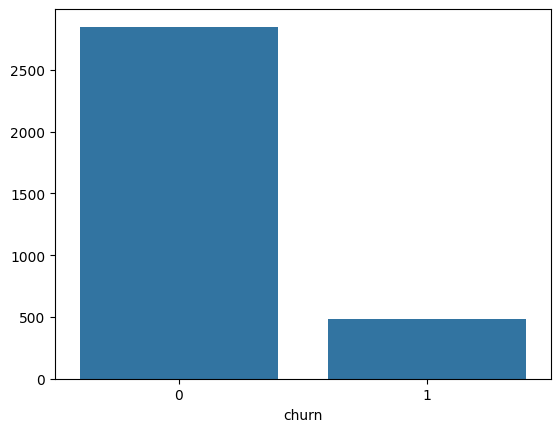

In [448]:
df['churn'].value_counts()
sns.barplot(x=df['churn'].value_counts().index, y=df['churn'].value_counts().values)
plt.show()

3. Feature Engineering:

In [449]:
# Total minutes
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
# Total calls
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']

# Total charge
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

# Average minutes per call
df['avg_minutes_per_call'] = df['total_minutes'] / df['total_calls']

# Customer service calls per account length
df['service_calls_per_length'] = df['customer_service_calls'] / df['account_length']


Creates aggregated features from existing ones

In [450]:
print(df[['total_minutes', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].head())
print(df[['total_charge', 'total_day_charge', 'total_eve_charge', 'total_night_charge']].head())


   total_minutes  total_day_minutes  total_eve_minutes  total_night_minutes
0          707.2              265.1              197.4                244.7
1          611.5              161.6              195.5                254.4
2          527.2              243.4              121.2                162.6
3          558.2              299.4               61.9                196.9
4          501.9              166.7              148.3                186.9
   total_charge  total_day_charge  total_eve_charge  total_night_charge
0         72.86             45.07             16.78               11.01
1         55.54             27.47             16.62               11.45
2         59.00             41.38             10.30                7.32
3         65.02             50.90              5.26                8.86
4         49.36             28.34             12.61                8.41


In [ ]:
df.drop([
    'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
    'total_day_calls', 'total_eve_calls', 'total_night_calls',
    'total_day_charge', 'total_eve_charge', 'total_night_charge'
], axis=1, inplace=True)

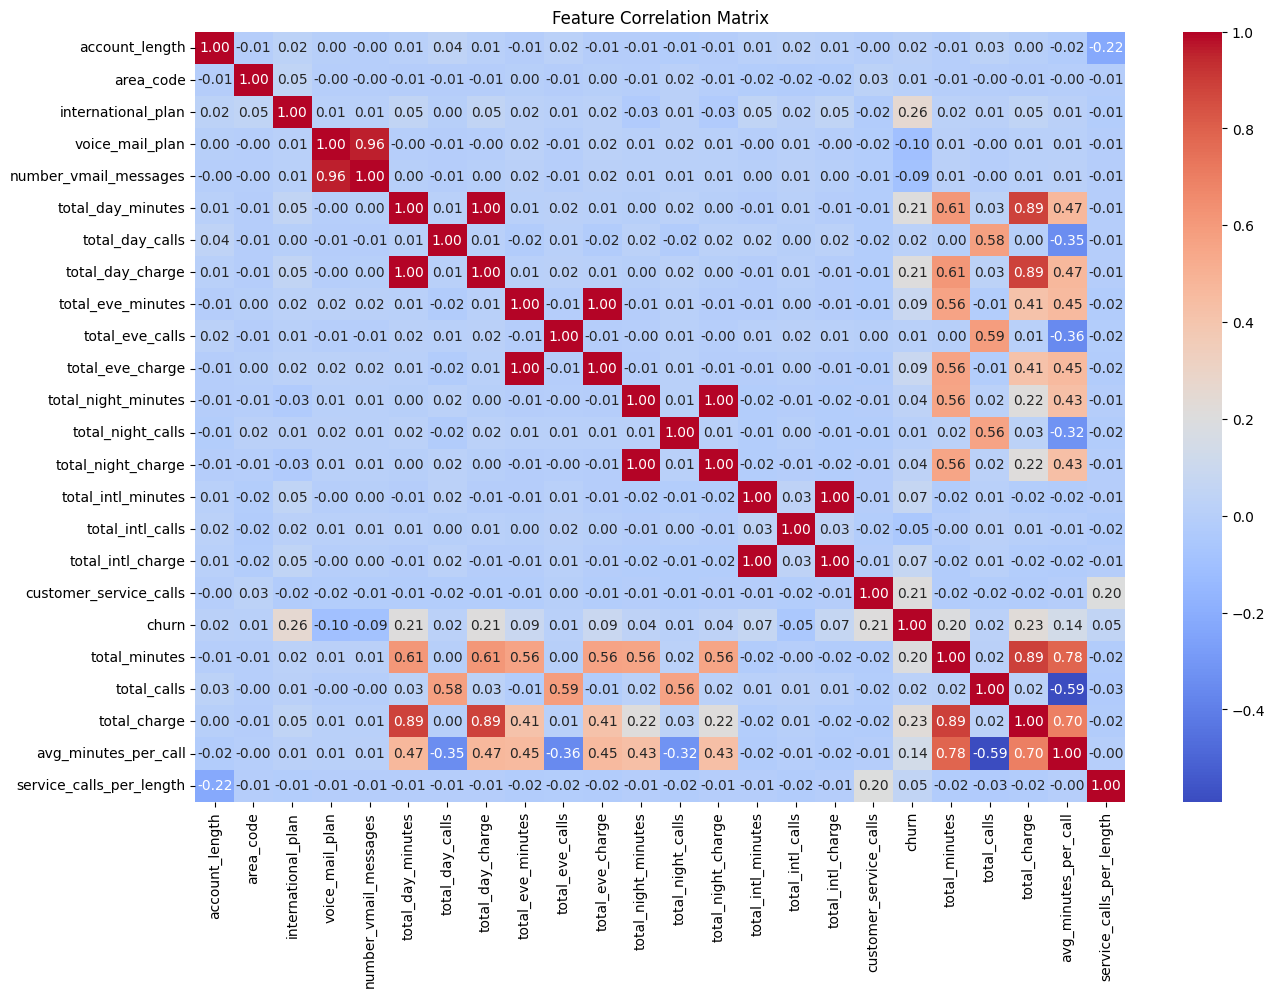

In [451]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


Feature correlation helps us see how different variables in our dataset are connected. If two features have a strong positive correlation (close to 1.0), it means that when one increases, the other tends to increase too. If the correlation is negative (close to -1.0), it means that when one increases, the other decreases.
For example:
- If "total minutes" and "total charge" have a high correlation, it makes sense—more minutes mean a higher charge.
- If "customer service calls" and "churn" have a strong correlation, it might mean that customers who call frequently are likely to leave.
We use correlation to choose the best features for a machine learning model. If two features are almost identical, we can remove one to avoid redundancy. If a feature strongly relates to the target variable (like churn), it could be a key predictor.


In [ ]:
y = df["churn"].value_counts()
print(f"Churn Data :\n{y}\n")

# save all the rows where churn is True
y_True = df["churn"][df["churn"] == True]
print(y_True)

print ("\nChurn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Data :
churn
0    2850
1     483
Name: count, dtype: int64

10      1
15      1
21      1
33      1
41      1
       ..
3301    1
3304    1
3320    1
3322    1
3323    1
Name: churn, Length: 483, dtype: int64

Churn Percentage = 14.491449144914492


In [ ]:
print(df.columns.tolist())


['account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn', 'total_minutes', 'total_calls', 'total_charge', 'avg_minutes_per_call', 'service_calls_per_length']


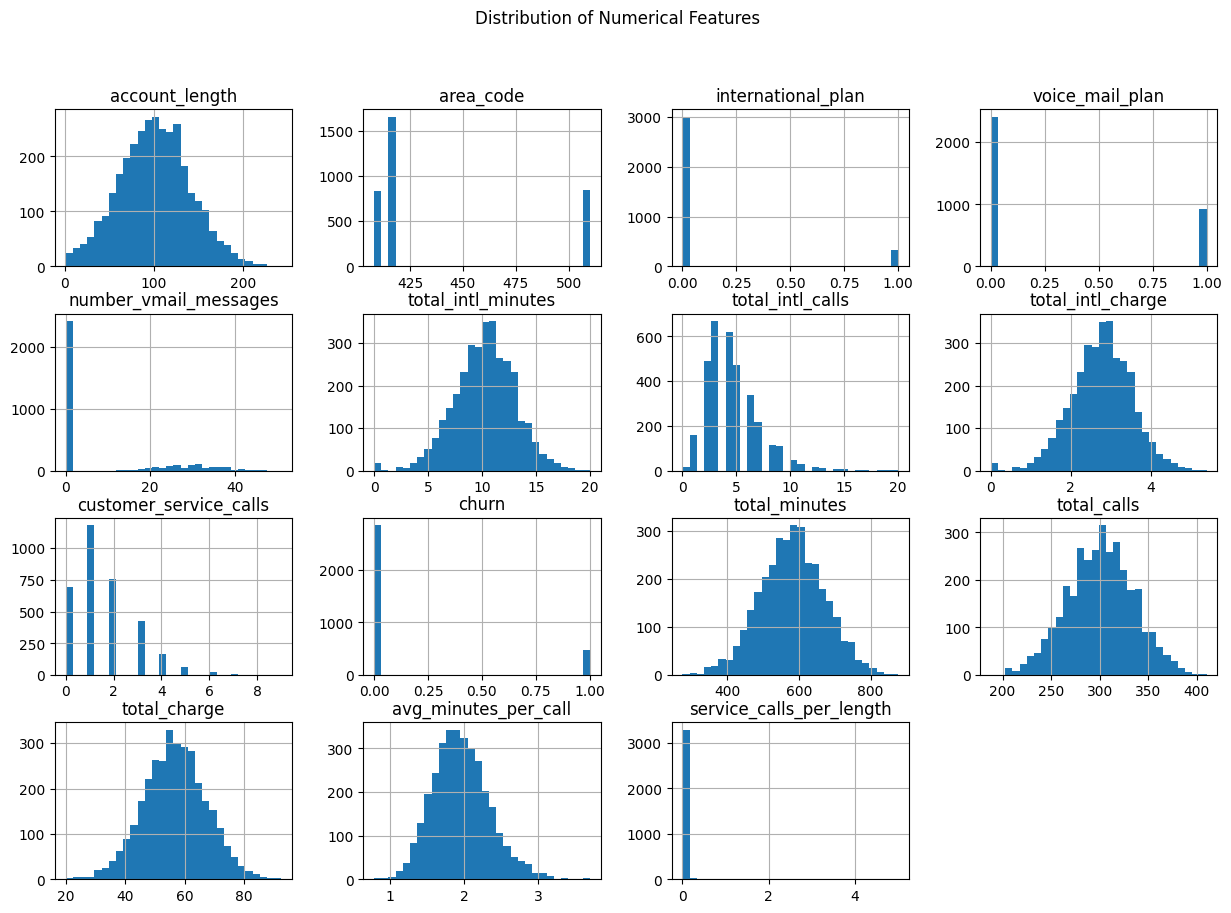

In [ ]:
# Plot distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [453]:
df = df[["customer_service_calls","voice_mail_plan","international_plan","total_minutes","total_charge","avg_minutes_per_call","number_vmail_messages","service_calls_per_length","churn"]]
df.head()

,customer_service_calls,voice_mail_plan,international_plan,total_minutes,total_charge,avg_minutes_per_call,number_vmail_messages,service_calls_per_length,churn
0,1,1,0,707.2,72.86,2.357333,25,0.007812,0
1,1,1,0,611.5,55.54,1.858663,26,0.009346,0
2,0,0,0,527.2,59.00,1.607317,0,0.000000,0
3,2,0,1,558.2,65.02,2.250806,0,0.023810,0
4,3,0,1,501.9,49.36,1.409831,0,0.040000,0


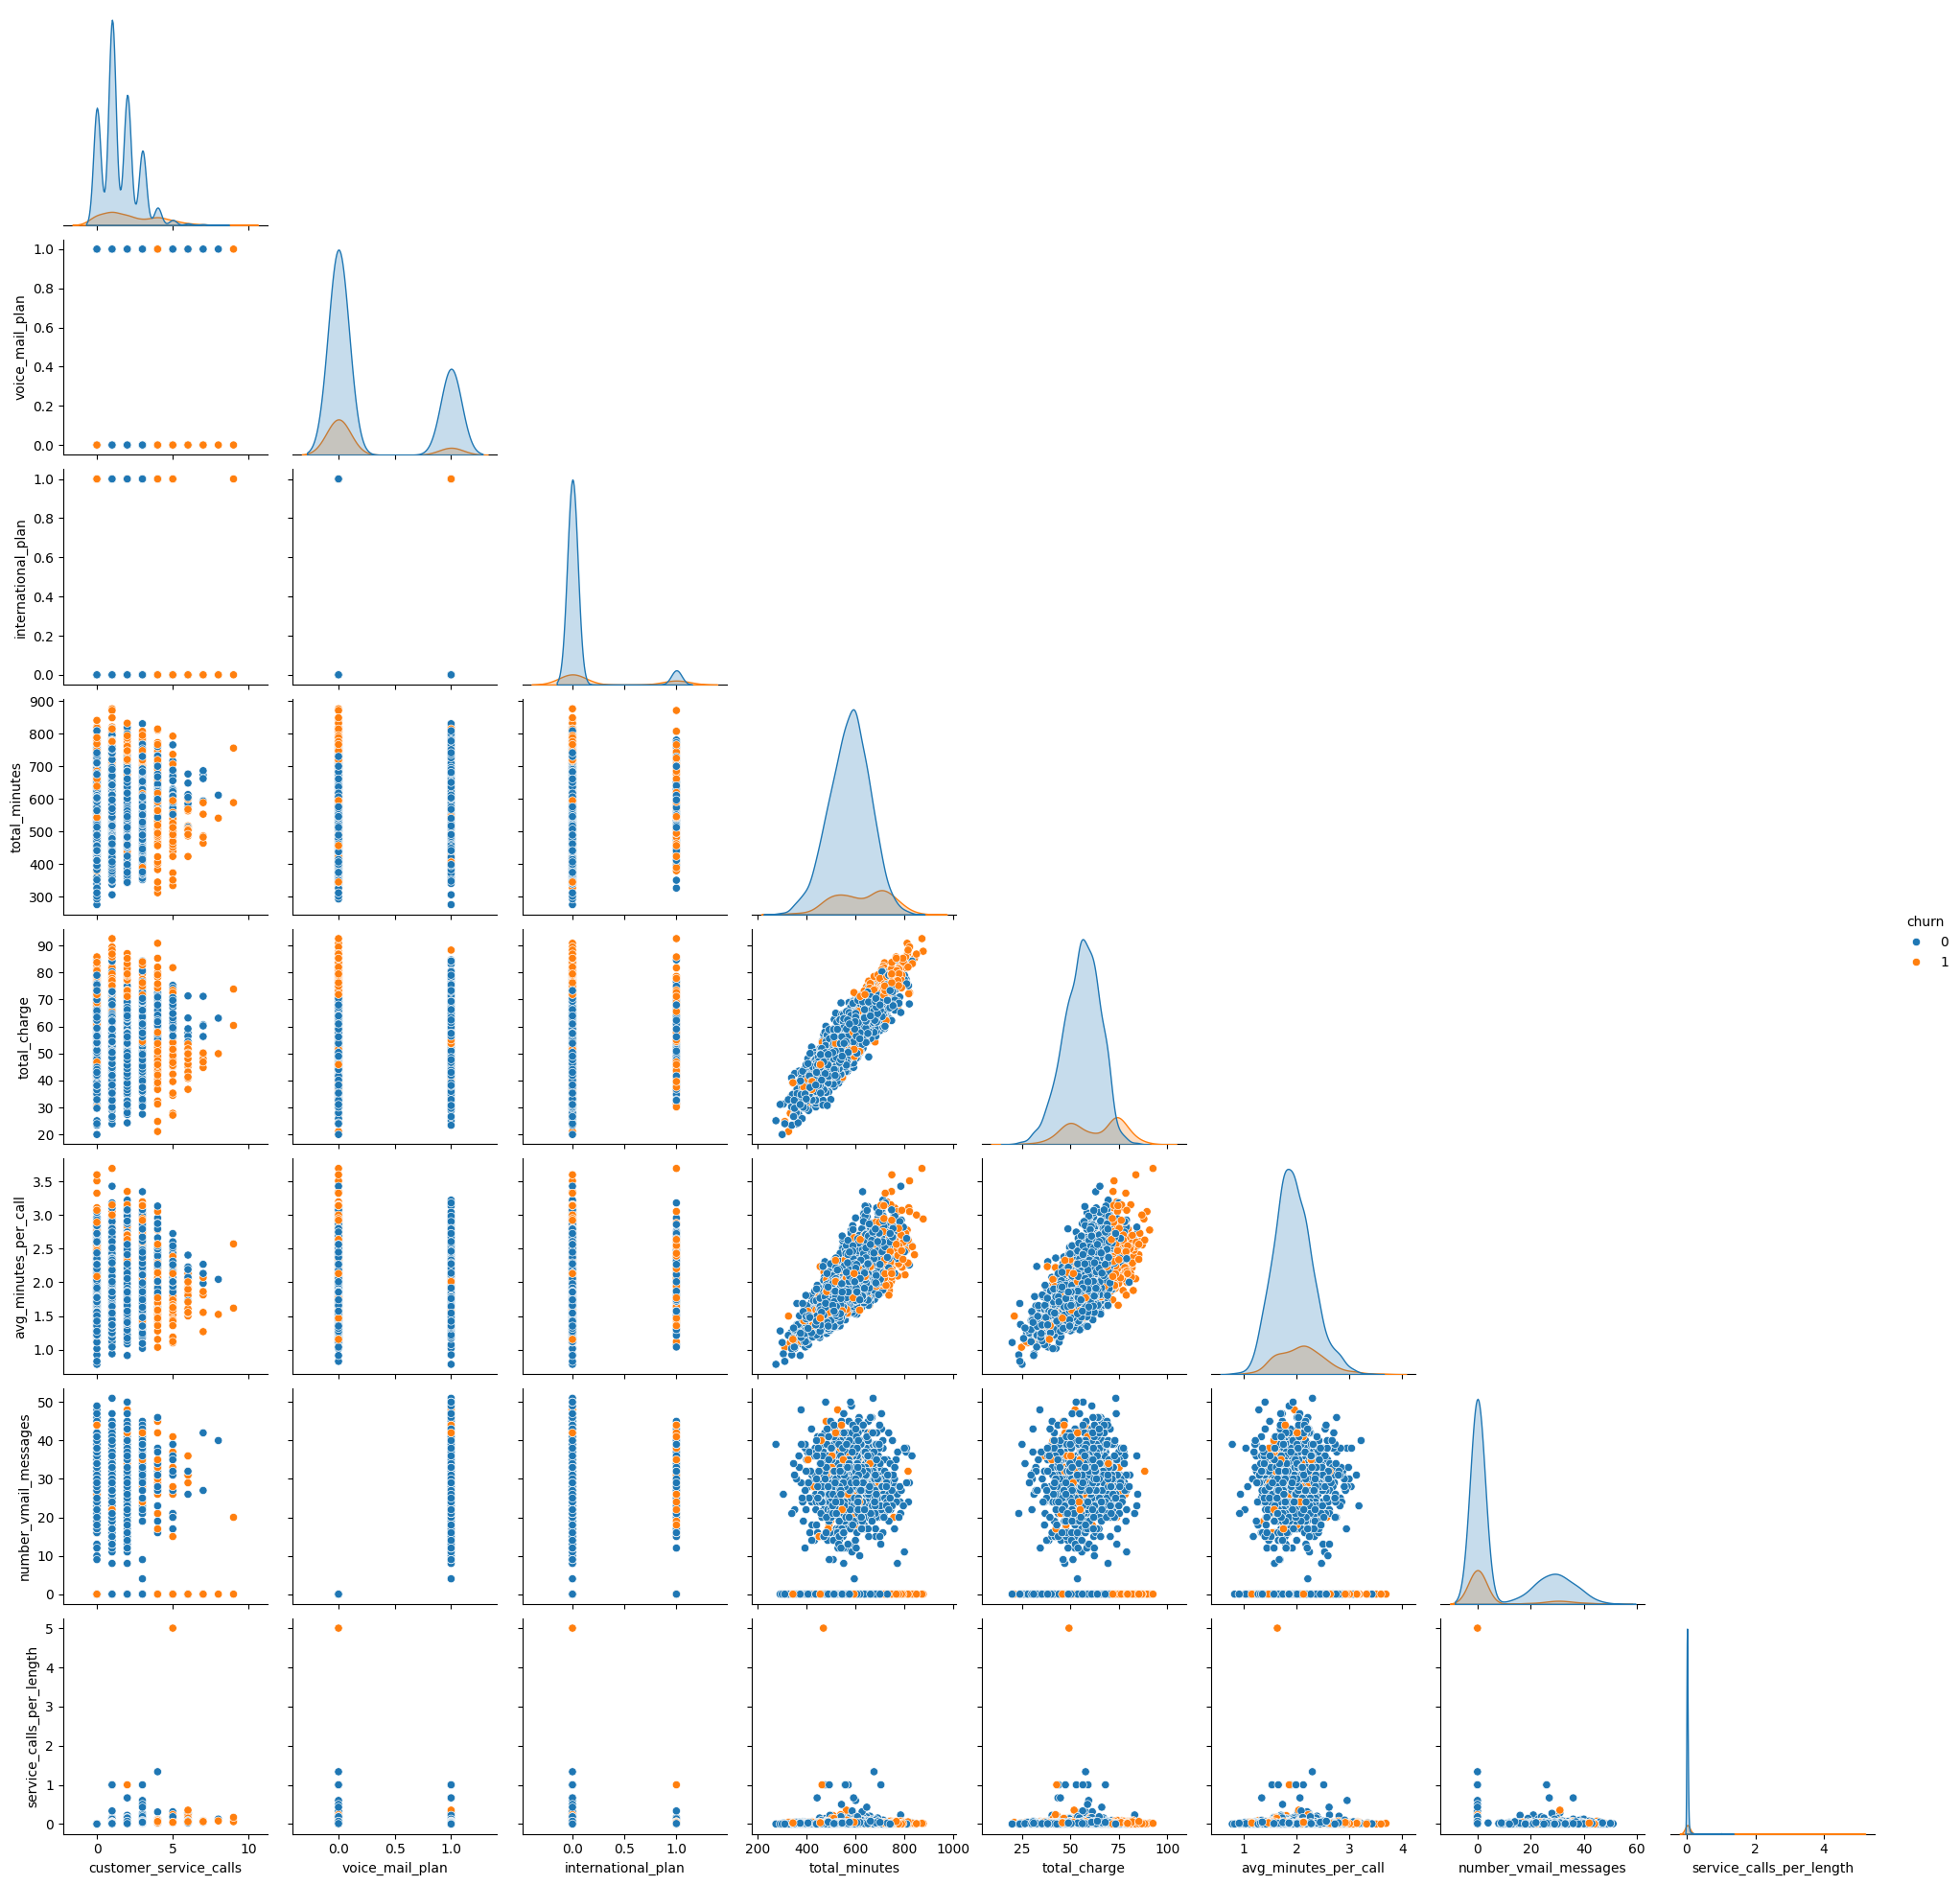

In [454]:
sns.pairplot(df,corner=True,hue="churn")

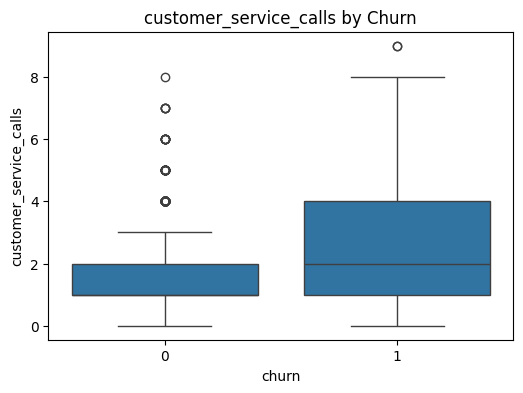

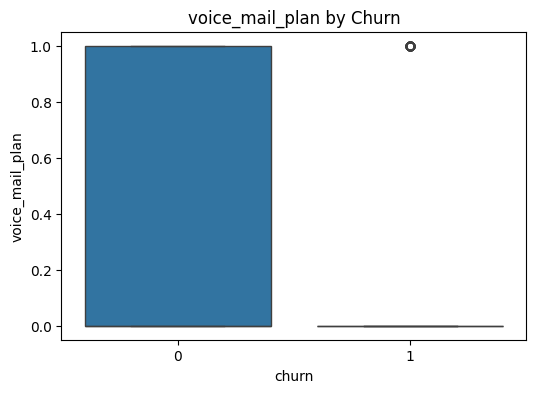

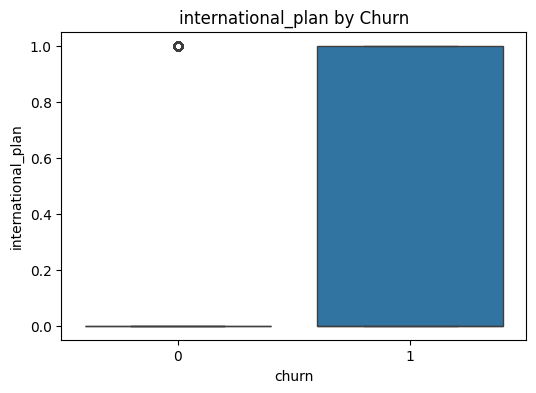

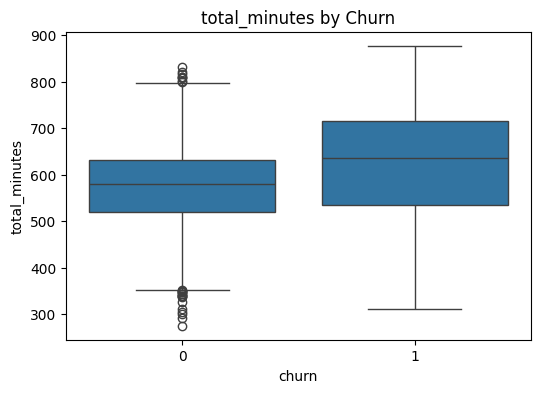

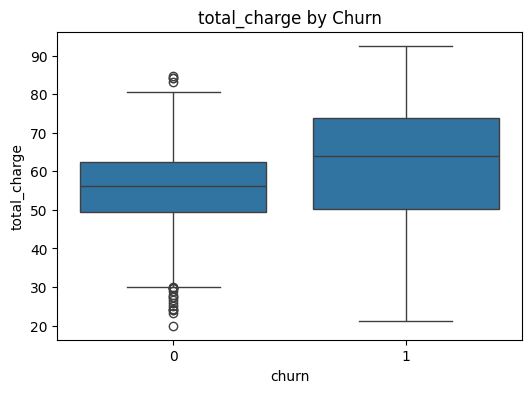

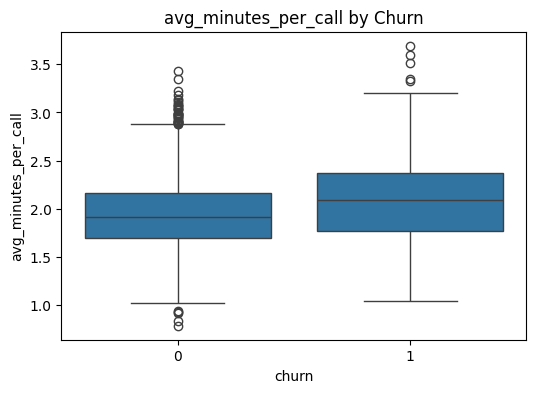

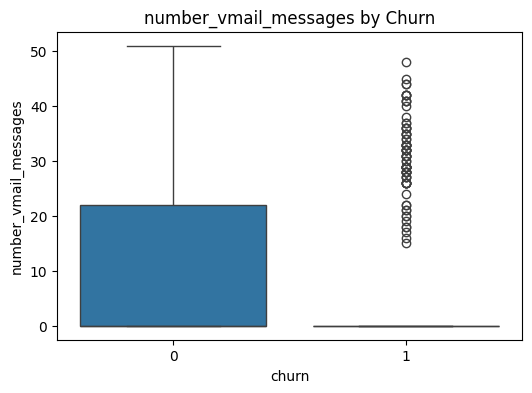

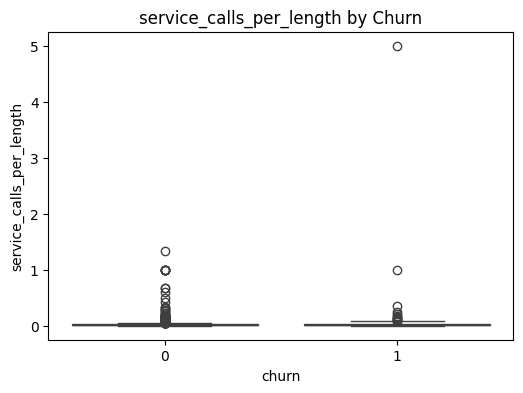

In [455]:
key_features = [
    "customer_service_calls",
    "voice_mail_plan",
    "international_plan",
    "total_minutes",
    "total_charge",
    "avg_minutes_per_call",
    "number_vmail_messages",
    "service_calls_per_length"
]
for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} by Churn')
    plt.show()



In [456]:
print(df.columns.tolist())


['customer_service_calls', 'voice_mail_plan', 'international_plan', 'total_minutes', 'total_charge', 'avg_minutes_per_call', 'number_vmail_messages', 'service_calls_per_length', 'churn']


In [457]:

X = df.drop("churn", axis=1)
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Identify Numeric and Categorical Columns

In [458]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

if 'customerID' in numeric_cols:
    numeric_cols.remove('customerID')
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

In [459]:
# These are numerical features relevant for churn prediction
numeric_features = [
    'customer_service_calls',
    'total_minutes',
    'total_charge',
    'avg_minutes_per_call',
    'number_vmail_messages',
    'service_calls_per_length'
]

# These are categorical features relevant for churn prediction
possible_categoricals = ['international_plan', 'voice_mail_plan']
categorical_features = [col for col in possible_categoricals if col in df.columns]


## Preprocessing (Avoiding Data Leakage)

In [460]:
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_cols])
X_test_num = scaler.transform(X_test[numeric_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

X_train_final = np.hstack((X_train_num, X_train_cat))
X_test_final = np.hstack((X_test_num, X_test_cat))

In [461]:

# Select numeric columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Scale numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

In [462]:

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

In [463]:

# Scale numeric features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_features])
X_test_num = scaler.transform(X_test[numeric_features])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

In [464]:

#  Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_final, y_train)
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: churn
0    2284
1     382
Name: count, dtype: int64
After SMOTE: churn
0    2284
1    2284
Name: count, dtype: int64


Before SMOTE
Class 0 (Not Churned): 2284 samples

Class 1 (Churned): 382 samples
> The dataset is highly imbalanced.

After SMOTE
Class 0 (Not Churned): 2284 samples

Class 1 (Churned): 2284 samples
> The dataset is now perfectly balanced.

## Logistic Regression (Baseline Model)

In [ ]:
X_train = X_train.drop(columns=['phone_number'])
X_test = X_test.drop(columns=['phone_number'])

In [466]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test_final)
y_prob = model.predict_proba(X_test_final)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       566
           1       0.38      0.78      0.51       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.68       667
weighted avg       0.87      0.78      0.80       667

ROC AUC Score: 0.8430885491375992



The model correctly identifies 78% of both churned and non-churned customers. It is especially good at catching churners (recall = 78%) but sometimes wrongly predicts churn (precision = 38%). Overall, the model is fairly accurate (78%) and has a strong ability to distinguish between classes (ROC AUC = 0.84).

In [468]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       566
           1       0.85      0.70      0.77       101

    accuracy                           0.94       667
   macro avg       0.90      0.84      0.87       667
weighted avg       0.93      0.94      0.93       667

ROC AUC Score: 0.8430885491375992


The XGBoost model is highly accurate (94%) and performs well at identifying both churned and non-churned customers. It detects 70% of churners (recall) and is correct 85% of the time when it predicts a customer will churn (precision). The ROC AUC score of 0.84 shows the model has a strong ability to distinguish between churn and non-churn.

In [469]:
xgb = XGBClassifier(scale_pos_weight=566/101, use_label_encoder=False, eval_metric='logloss')


## Performance:
Accuracy: 0.98 (excellent overall performance)

Macro Avg F1: 0.95 – balances performance across classes

Weighted Avg F1: 0.98 – influenced by the dominant class (0

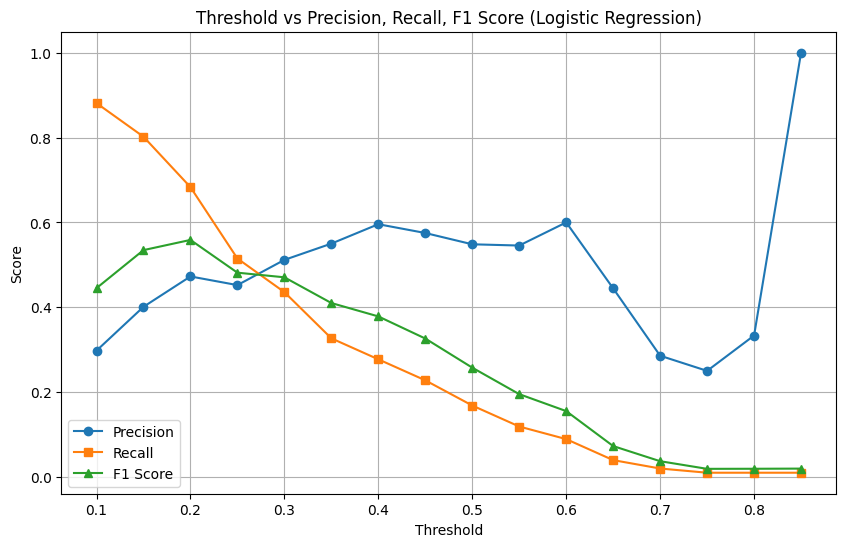

In [470]:
# Get predicted probabilities for the positive class (churn = 1)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Define thresholds to evaluate
thresholds = np.arange(0.1, 0.9, 0.05)

# Prepare lists to store metrics
precisions, recalls, f1_scores = [], [], []

# Calculate metrics at each threshold
for t in thresholds:
    y_pred_adjusted = (y_prob_lr >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_adjusted))
    recalls.append(recall_score(y_test, y_pred_adjusted))
    f1_scores.append(f1_score(y_test, y_pred_adjusted))

# Plot precision, recall, F1 vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='s')
plt.plot(thresholds, f1_scores, label='F1 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision, Recall, F1 Score (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


This feature correlation matrix shows how different features in the dataset relate to each other. Darker colors indicate stronger negative correlations, while lighter colors represent weak or no correlations. Since there are no strong positive correlations, it suggests that most features don’t have a direct, predictable relationship with each other. This means that to improve model predictions, you may need to create new combined features that better capture customer behavior.


In [471]:
optimal_threshold = 0.23
y_pred_final = (y_prob_lr >= optimal_threshold).astype(int)


In [ ]:
churn_rate = np.mean(y_pred_final)  
print(f"Churn Prediction Rate: {churn_rate:.2f}")

Churn Prediction Rate: 0.20


In [472]:
actual_churn_rate = np.mean(y_test)
print(f"Actual Churn Rate: {actual_churn_rate:.2f}")

Actual Churn Rate: 0.15


In [473]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       566
           1       0.47      0.60      0.53       101

    accuracy                           0.84       667
   macro avg       0.70      0.74      0.72       667
weighted avg       0.86      0.84      0.85       667



In [474]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [475]:
feature_names = X_train.columns
print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of feature_importances: {len(rf.feature_importances_)}")  # Print lengths of each array
print("Feature Names:", feature_names)
print("Feature Importance Shape:", rf.feature_importances_.shape)

Length of feature_names: 8
Length of feature_importances: 8
Feature Names: Index(['customer_service_calls', 'voice_mail_plan', 'international_plan',
       'total_minutes', 'total_charge', 'avg_minutes_per_call',
       'number_vmail_messages', 'service_calls_per_length'],
      dtype='object')
Feature Importance Shape: (8,)


In [476]:
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances_df)


                    Feature  Importance
4              total_charge    0.335019
3             total_minutes    0.170860
0    customer_service_calls    0.127138
5      avg_minutes_per_call    0.110531
7  service_calls_per_length    0.088996
2        international_plan    0.070983
6     number_vmail_messages    0.057887
1           voice_mail_plan    0.038586


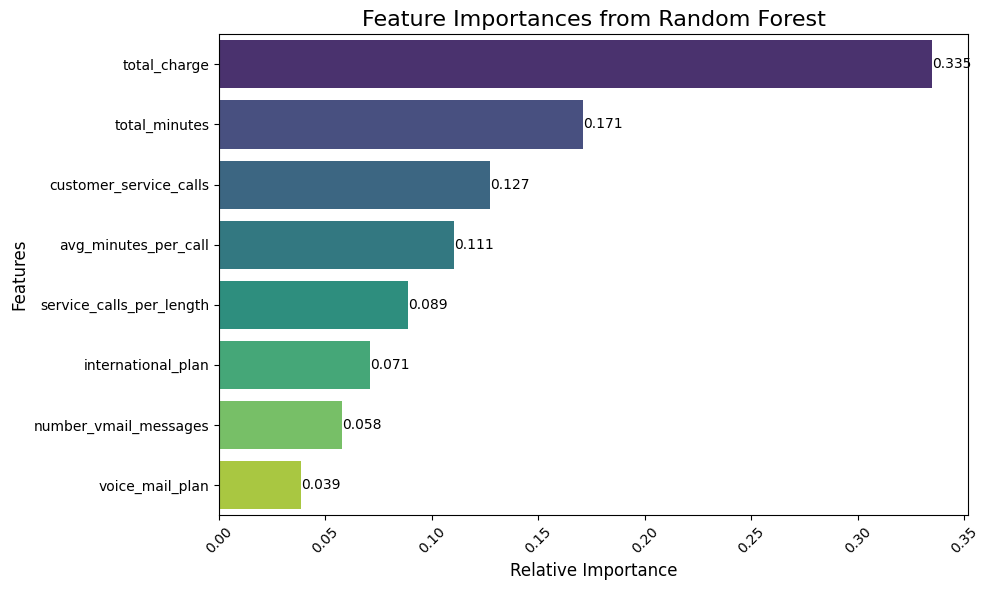

In [ ]:
# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')

# Customizing the plot
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45)  

# Adding value labels on each bar
for index, value in enumerate(importances_df['Importance']):
    plt.text(value, index, f'{value:.3f}', va='center')

plt.tight_layout()  
plt.show()

"""Total charge is the most critical factor influencing customer churn, followed by usage patterns and customer service interactions, suggesting that pricing strategies and service quality improvements should be prioritized to reduce churn."""

In [480]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_final, y_train, cv=cv, scoring='f1')

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))

Cross-Validation F1 Scores: [0.21276596 0.16091954 0.26666667 0.38181818 0.25454545]
Mean F1 Score: 0.2553431601413993


The cross-validation F1 scores range from 0.16 to 0.38, showing high variability that suggests inconsistent model performance across different data subsets. The average F1 score of 0.26 indicates the model struggles to effectively identify churn cases while maintaining precision. This performance likely stems from either severe class imbalance, insufficient training data, or the need for better feature engineering to improve prediction consistency.

## XGBoost Model & Hyperparameter Tuning

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

grid_search.fit(X_train_final, y_train)
best_xgb = grid_search.best_estimator_

print("Best XGBoost Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


## Evaluate XGBoost

In [ ]:
y_pred_xgb = best_xgb.predict(X_test_final)
y_prob_xgb = best_xgb.predict_proba(X_test_final)[:, 1]

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       0.98      0.86      0.92       101

    accuracy                           0.98       667
   macro avg       0.98      0.93      0.95       667
weighted avg       0.98      0.98      0.98       667

Confusion Matrix:
 [[564   2]
 [ 14  87]]
ROC AUC Score: 0.9178007906797746


## Feature Importance (XGBoost)

In [ ]:
print(X_train.columns.tolist())


['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'total_minutes', 'total_calls', 'total_charge', 'avg_minutes_per_call', 'service_calls_per_length']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define your categorical and numerical columns
categorical_cols = ['gender', 'contract', 'payment_method']
numerical_cols = ['tenure', 'monthly_charges', 'total_charges']

# Create the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [ ]:
import pandas as pd

# If X_train_res was created by resampling, and it became an ndarray, rewrap it:
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)


In [ ]:
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns.to_list())
X_train_res


,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_minutes,total_calls,total_charge,avg_minutes_per_call,service_calls_per_length
0,3.601382,1.735840,-0.326624,-0.611162,-0.584936,-1.300791,0.634849,-1.304132,0.318978,-0.640810,-0.804609,-1.397645,-0.108918,-0.144938
1,0.184951,-0.517168,-0.326624,-0.611162,-0.584936,-2.194793,-0.184370,-2.191525,1.813519,-0.739003,0.222507,-1.123412,-0.757809,0.122246
2,-0.650176,-0.517168,3.061624,-0.611162,-0.584936,-0.549828,1.863677,-0.549186,-0.428293,1.970232,-0.217685,1.759877,1.649373,-0.097608
3,1.020079,-0.517168,-0.326624,-0.611162,-0.584936,-0.800149,-1.003589,-0.800835,-0.428293,-1.485493,-0.364416,-1.285459,-1.063946,-0.155495
4,-0.371801,1.735840,-0.326624,-0.611162,-0.584936,-2.051753,-0.593980,-2.045833,-1.175564,1.291807,-0.511147,1.191273,1.324189,-0.221276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,0.700375,1.735840,-0.326624,1.636228,2.042048,0.104989,0.182721,0.110801,1.027464,0.961401,0.857460,0.836463,0.170877,-0.005890
4564,0.656109,-0.651451,3.061624,-0.611162,-0.584936,-0.777575,-1.003589,-0.777696,-0.571111,-0.419799,1.357093,-0.302331,-1.028866,-0.162202
4565,-0.539145,-0.517168,-0.326624,-0.611162,-0.584936,-0.779354,-1.286185,-0.775881,-0.196576,0.826731,0.490716,1.811563,0.280923,-0.050202
4566,2.076161,-0.638642,-0.326624,-0.611162,-0.584936,1.315814,-0.783813,1.316384,0.865774,0.701270,0.984070,1.406944,-0.085563,-0.079427


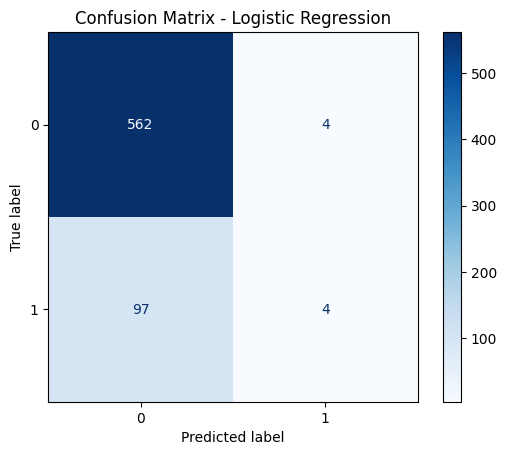

In [ ]:
from sklearn import metrics

# Example
y_pred = model.predict(X_test)  # assuming 'model' is your trained logistic regression model
conf_mat = metrics.confusion_matrix(y_test, y_pred)
from sklearn.linear_model import LogisticRegression
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
import statsmodels.api as sm

# Add constant manually
X_train_sm = sm.add_constant(X_train_res)
X_test_sm = sm.add_constant(X_test_scaled, has_constant='add')

logit_model = sm.Logit(y_train_res, X_train_sm)
result = logit_model.fit()

# Predict probabilities and labels
y_pred_prob = result.predict(X_test_sm)
y_pred = (y_pred_prob >= 0.5).astype(int)


Optimization terminated successfully.
         Current function value: 0.503889
         Iterations 6


In [ ]:

# Instantiate the model
model = Ridge(alpha=100,solver="sag", random_state=1)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)


Ridge(alpha=100, random_state=1, solver='sag')

In [ ]:

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [ ]:

train_rmse = np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test))

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"""
RMSE
Train: {train_rmse} \t Test: {test_rmse}

R-squared
Train: {train_r2} \t Test: {test_r2}
""")


RMSE
Train: 0.3172984230863006 	 Test: 0.3253033906288639

R-squared
Train: 0.1798436435405707 	 Test: 0.17644796863587242



In [ ]:
probas = {}
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    probas[name] = y_proba


In [ ]:

# 4. Initialize models
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)


# 5. Train models on balanced data
dt.fit(X_train_res, y_train_res)
lr.fit(X_train_res, y_train_res)

# 6. Predict probabilities on test set
dt_probs = dt.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]

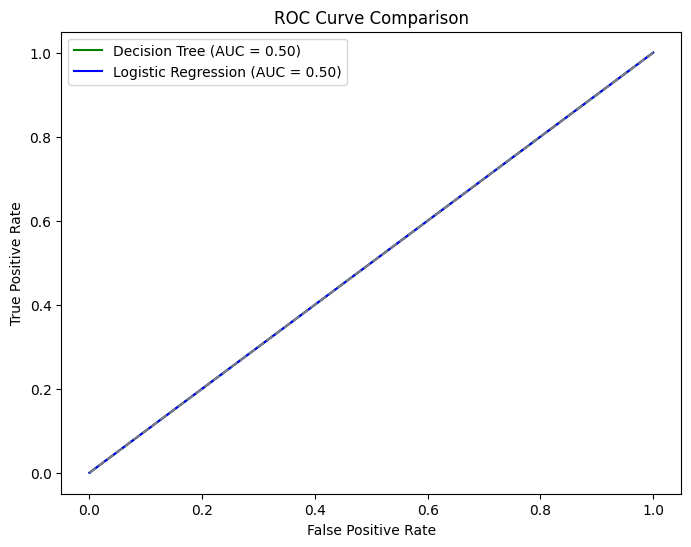

In [ ]:
# Compute ROC curves and AUCs
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_auc = auc(dt_fpr, dt_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

# 8. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, color='green', label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, color='blue', label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#  Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           scoring='roc_auc',
                           cv=3,
                           n_jobs=-1)

grid_search.fit(X_train_res, y_train_res)

print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation AUC: {grid_search.best_score_:.3f}")

Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation AUC: 0.968


In [ ]:
y_proba_log = lr.predict_proba(X_test)[:, 1]
y_pred_log = lr.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]      
y_pred_dt = dt.predict(X_test)         

In [ ]:
# Calculate metrics
roc_auc_log = roc_auc_score(y_test, y_proba_log)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)

print(f"Logistic Regression AUC: {roc_auc_log:.4f}")
print(f"Decision Tree AUC: {roc_auc_dt:.4f}")

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))


Logistic Regression AUC: 0.5000
Decision Tree AUC: 0.5000
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       566
           1       0.15      1.00      0.26       101

    accuracy                           0.15       667
   macro avg       0.08      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       566
           1       0.15      1.00      0.26       101

    accuracy                           0.15       667
   macro avg       0.08      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

ROC AUC: 1.0


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[['international plan', 'voice mail plan']])

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_poly, y_train)

best_logistic = grid.best_estimator_

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
# Import XGBoost
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(random_state=42) 

# Fit the model (assuming X_train_poly and y_train exist)
xgb_model.fit(X_train_poly, y_train)

# Now you can make predictions
y_pred = xgb_model.predict(X_test_poly)

Iteration 0: Cost = 0.6931
Iteration 100: Cost = 0.3363
Iteration 200: Cost = 0.2995
Iteration 300: Cost = 0.2868
Iteration 400: Cost = 0.2808
Iteration 500: Cost = 0.2776
Iteration 600: Cost = 0.2757
Iteration 700: Cost = 0.2745
Iteration 800: Cost = 0.2737
Iteration 900: Cost = 0.2732


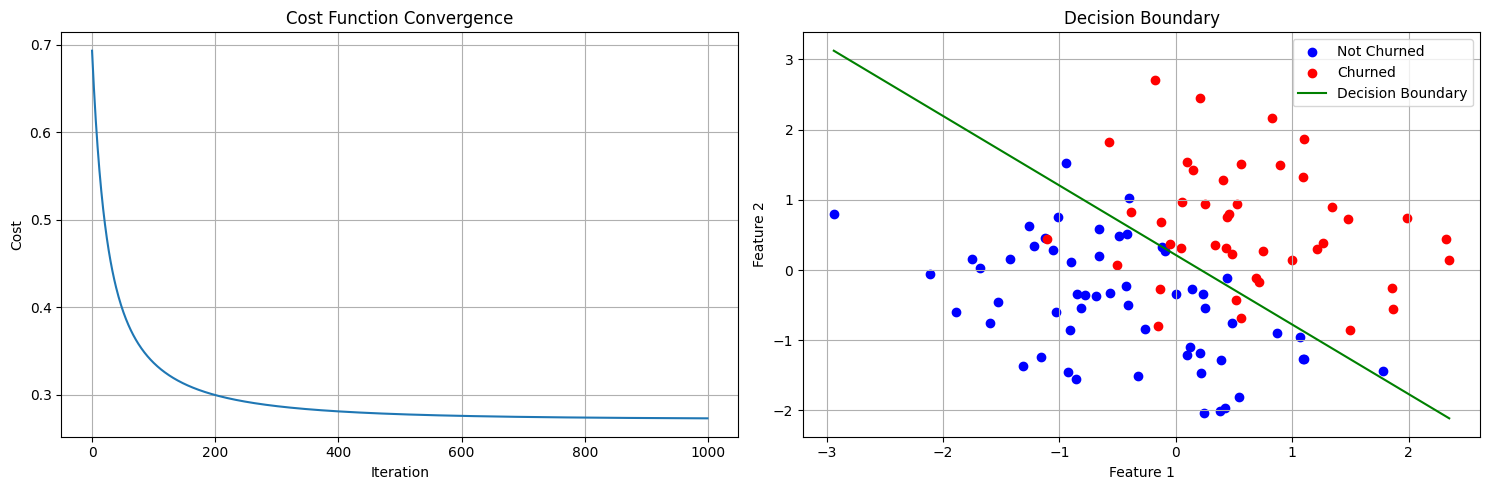

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    # Add intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Initialize parameters
    theta = np.zeros(X.shape[1])
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        # Calculate predictions and gradient
        z = X.dot(theta)
        h = sigmoid(z)
        gradient = (1/m) * X.T.dot(h - y)
        
        # Update parameters
        theta -= learning_rate * gradient
        
        # Calculate and store cost
        cost = (-1/m) * np.sum(y * np.log(h + 1e-5) + (1-y) * np.log(1-h + 1e-5))
        cost_history.append(cost)
        
        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")
    
    return theta, cost_history

def predict(X, theta, threshold=0.5):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return (sigmoid(X.dot(theta)) >= threshold).astype(int)

def plot_results(X, y, theta, cost_history):
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Cost function over iterations
    plt.subplot(1, 2, 1)
    plt.plot(cost_history)
    plt.title('Cost Function Convergence')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.grid(True)
    
    # Plot 2: Decision boundary (for 2D data)
    if X.shape[1] == 2:  # Only plot if we have 2 features
        plt.subplot(1, 2, 2)
        
        # Plot the data points
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Not Churned')
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Churned')
        
        # Plot the decision boundary
        x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
        y_values = -(theta[0] + theta[1] * x_values) / theta[2]
        plt.plot(x_values, y_values, label='Decision Boundary', color='green')
        
        plt.title('Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Generate sample data (replace with your Syrian churn dataset)
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] + np.random.randn(100) * 0.5 > 0).astype(int)  # Simple linear decision boundary

# Normalize features (important for gradient descent)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train the model
theta, cost_history = logistic_regression(X, y, learning_rate=0.1, iterations=1000)

# Make predictions
y_pred = predict(X, theta)

# Plot results
plot_results(X, y, theta, cost_history)